In [1]:
import onnx
import onnxruntime as rt
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from onnx_export_classes import OnnxWrapper

In [2]:
INPUT_TENSOR_PATH = '/mnt/srs-speechcore-data/tmp/ort_issue/input_tensor.pt'
INPUT_LENGTH_PATH = '/mnt/srs-speechcore-data/tmp/ort_issue/length_tensor.pt'
ONNX_MODEL_PATH = '/mnt/srs-speechcore-data/tmp/ort_issue/model_onnx.onnx'

In [3]:
input_tensor = torch.load(INPUT_TENSOR_PATH)
input_length = torch.load(INPUT_LENGTH_PATH)

In [4]:
def compute_onnx_logits(wrapper, xlen, input):
    wrapper_out = wrapper.forward(input, xlen)
    wrapper_logits = wrapper_out["logits"]
    
    return wrapper_logits

def plot_heatmap_and_save(tensor, name):
    sns.heatmap(tensor.numpy()).set(title=name)
    plt.savefig(f'pics/{name}.png')
    plt.show()

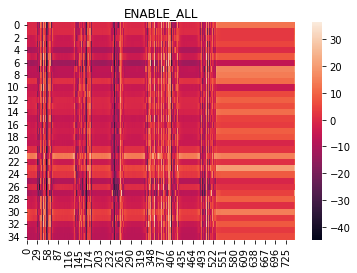

In [5]:
wrapper_enable_all = OnnxWrapper(
    onnx_model_path=ONNX_MODEL_PATH,
    optimization_level=rt.GraphOptimizationLevel.ORT_ENABLE_ALL
    )
onnx_logits_enable_all = compute_onnx_logits(wrapper_enable_all,\
                                             input_length,\
                                             input_tensor)

plot_heatmap_and_save(onnx_logits_enable_all[1], 'ENABLE_ALL')

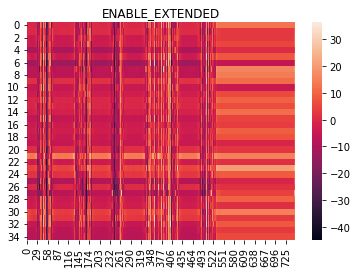

In [6]:
wrapper_enable_extended = OnnxWrapper(
    onnx_model_path=ONNX_MODEL_PATH,
    optimization_level=rt.GraphOptimizationLevel.ORT_ENABLE_EXTENDED
    )

onnx_logits_enable_extended = compute_onnx_logits(wrapper_enable_extended,\
                                             input_length,\
                                             input_tensor)

plot_heatmap_and_save(onnx_logits_enable_extended[1], 'ENABLE_EXTENDED')

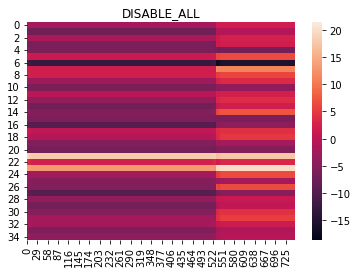

In [7]:
wrapper_disable_all = OnnxWrapper(
    onnx_model_path=ONNX_MODEL_PATH,
    optimization_level=rt.GraphOptimizationLevel.ORT_DISABLE_ALL
    )

onnx_logits_disable_all = compute_onnx_logits(wrapper_disable_all,\
                                              input_length,\
                                              input_tensor)

plot_heatmap_and_save(onnx_logits_disable_all[1], 'DISABLE_ALL')

In [8]:
torch.equal(onnx_logits_enable_all, onnx_logits_enable_extended)

True

In [9]:
torch.equal(onnx_logits_enable_all, onnx_logits_disable_all)

False

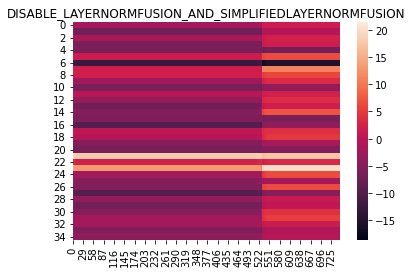

In [10]:
wrapper_disable_layernormfusion_simplifiedlayernormfusion = OnnxWrapper(
    onnx_model_path=ONNX_MODEL_PATH,
    optimization_level=rt.GraphOptimizationLevel.ORT_ENABLE_ALL,
    disabeled_optimizers= ['LayerNormFusion','SimplifiedLayerNormFusion']
    )

onnx_logits_disable_layernormfusion_simplifiedlayernormfusion = compute_onnx_logits(wrapper_disable_layernormfusion_simplifiedlayernormfusion,\
                                              input_length,\
                                              input_tensor)

plot_heatmap_and_save(onnx_logits_disable_layernormfusion_simplifiedlayernormfusion[1], 'DISABLE_LAYERNORMFUSION_AND_SIMPLIFIEDLAYERNORMFUSION')

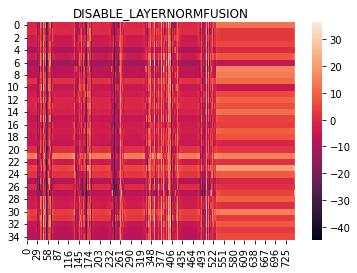

In [11]:
wrapper_disable_layernormfusion = OnnxWrapper(
    onnx_model_path=ONNX_MODEL_PATH,
    optimization_level=rt.GraphOptimizationLevel.ORT_ENABLE_ALL,
    disabeled_optimizers= ['LayerNormFusion']
    )

onnx_logits_disable_layernormfusion = compute_onnx_logits(wrapper_disable_layernormfusion,\
                                              input_length,\
                                              input_tensor)

plot_heatmap_and_save(onnx_logits_disable_layernormfusion[1], 'DISABLE_LAYERNORMFUSION')

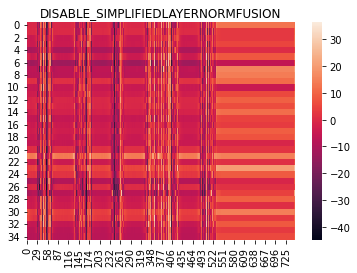

In [12]:
wrapper_disable_simplifiedlayernormfusion = OnnxWrapper(
    onnx_model_path=ONNX_MODEL_PATH,
    optimization_level=rt.GraphOptimizationLevel.ORT_ENABLE_ALL,
    disabeled_optimizers= ['SimplifiedLayerNormFusion']
    )

onnx_logits_disable_simplifiedlayernormfusion = compute_onnx_logits(wrapper_disable_simplifiedlayernormfusion,\
                                              input_length,\
                                              input_tensor)

plot_heatmap_and_save(onnx_logits_disable_simplifiedlayernormfusion[1], 'DISABLE_SIMPLIFIEDLAYERNORMFUSION')

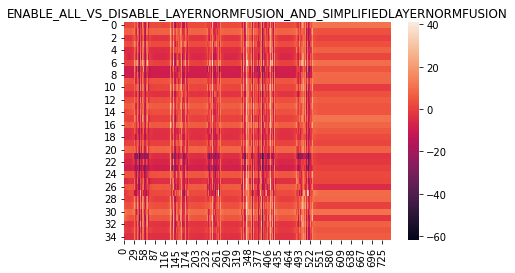

In [13]:
plot_heatmap_and_save(onnx_logits_enable_all[1] - onnx_logits_disable_layernormfusion_simplifiedlayernormfusion[1], 'ENABLE_ALL_VS_DISABLE_LAYERNORMFUSION_AND_SIMPLIFIEDLAYERNORMFUSION')